# Detecting Auto insurance fraud claims

In [452]:
# Import the libraries

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, roc_curve, precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier
import warnings

In [454]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_Interactivity = 'all'

In [455]:
data = pd.read_csv("C:\\Users\\Anju\\Desktop\\Data science misc\\Hand on Projects\\Auto Insurance Fraud Prediction - Streamlit\\insurance_claims.csv")

In [422]:
data.shape

(1000, 40)

In [6]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [418]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Feature Engineering and EDA

In [14]:
# Check missing values.

data.isnull().sum() 

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
# Column _c39 has all values missing, so we will drop this column.
# We will also drop some of the other irrelevant columns which has no relation to fraud: "auto_model", "policy_bind_date", 
# policy_state','policy_csl', 'incident_date', 'incident_state', 'incident_city' and 'incident_location.

In [456]:
data = data.drop(["_c39", "auto_model", "policy_bind_date", "policy_state", "incident_date",
               "incident_state", "incident_city", "incident_location", "policy_csl"], axis=1)

In [105]:
data.shape

(1000, 31)

In [117]:
for i in data.columns:
    if data[i].dtype == 'object':
        print(i, ":", data[i].nunique())

insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 5
property_damage : 3
police_report_available : 3
auto_make : 14
fraud_reported : 2


# EDA on target variable fraud_reported .

In [382]:
# fraud_reported is our target column. We will convert it to 1 and 0.
data['fraud_reported'] = data['fraud_reported'].str.replace('Y', '1')
data['fraud_reported'] = data['fraud_reported'].str.replace('N', '0')
data['fraud_reported'] = data['fraud_reported'].astype(int)

In [383]:
data['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

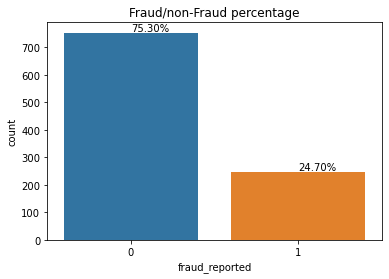

In [23]:
# Around 75% of the cases reported are not fraud.
# 0 - not Fraud.
# 1 - Fraud reported.

total = float(len(data))
plt.title('Fraud/non-Fraud percentage')
ax = sns.countplot(x="fraud_reported", data=data)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

In [179]:
# We will bin the ages and then check the trend for fraud vs. no fraud according to age.
data['age'].describe()


count    1000.000000
mean       38.948000
std         9.140287
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64

In [180]:
bin_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

data['age_group'] = pd.cut(data['age'], bins = bins, labels = bin_labels, include_lowest = True)

In [181]:
data['age_group'].value_counts()

36-40    201
31-35    195
41-45    184
26-30    157
46-50    109
51-55     50
56-60     46
21-25     38
61-65     18
15-20      2
Name: age_group, dtype: int64

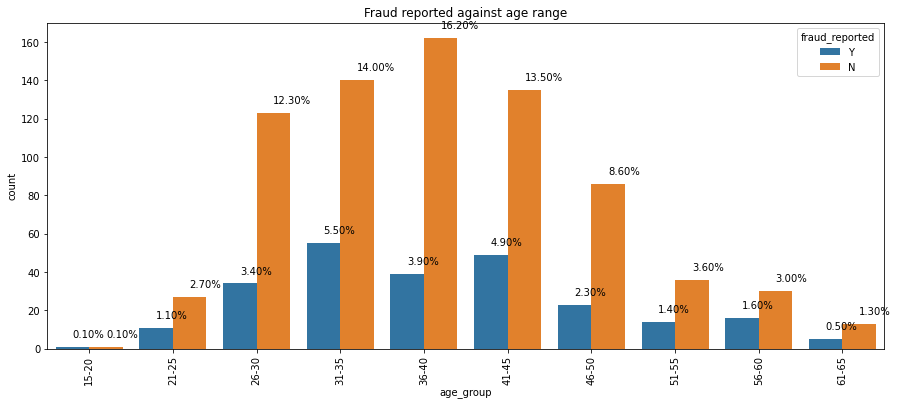

In [182]:
# We can see from below two plots that people in the age range of 31-35 and 41-45 committed the most frauds.

plt.figure(figsize=(15,6))
plt.title('Fraud reported against age range')
total = float(len(data))
ax = sns.countplot(x="age_group", data=data, hue = 'fraud_reported')
plt.xticks(rotation=90)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')


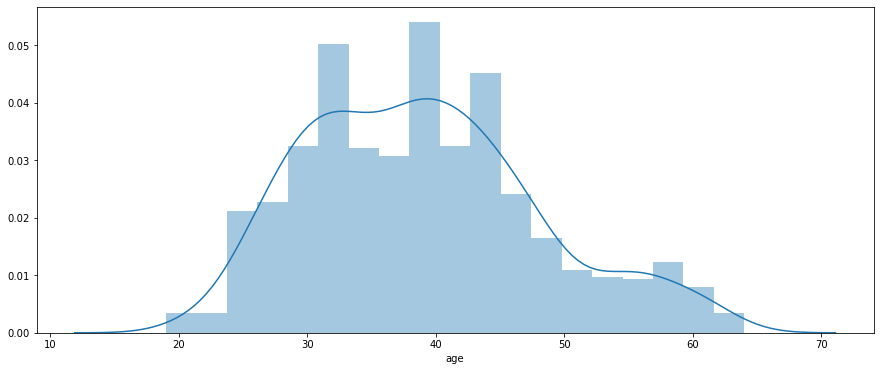

In [25]:
# understanding the customers based on age.

plt.figure(figsize=(15,6))
sns.distplot(data['age'])
plt.show()

Text(0, 0.5, 'Number of customers')

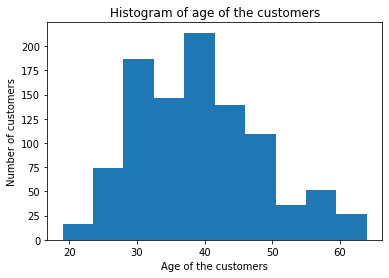

In [26]:
plt.hist(data.age)
plt.title("Histogram of age of the customers")
plt.xlabel("Age of the customers")
plt.ylabel("Number of customers")

In [457]:
pd.set_option('display.max_columns', None)

In [35]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported'],
      dtype='object')

# Feature Selection

In [110]:
corr = data.corr()
corr

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316


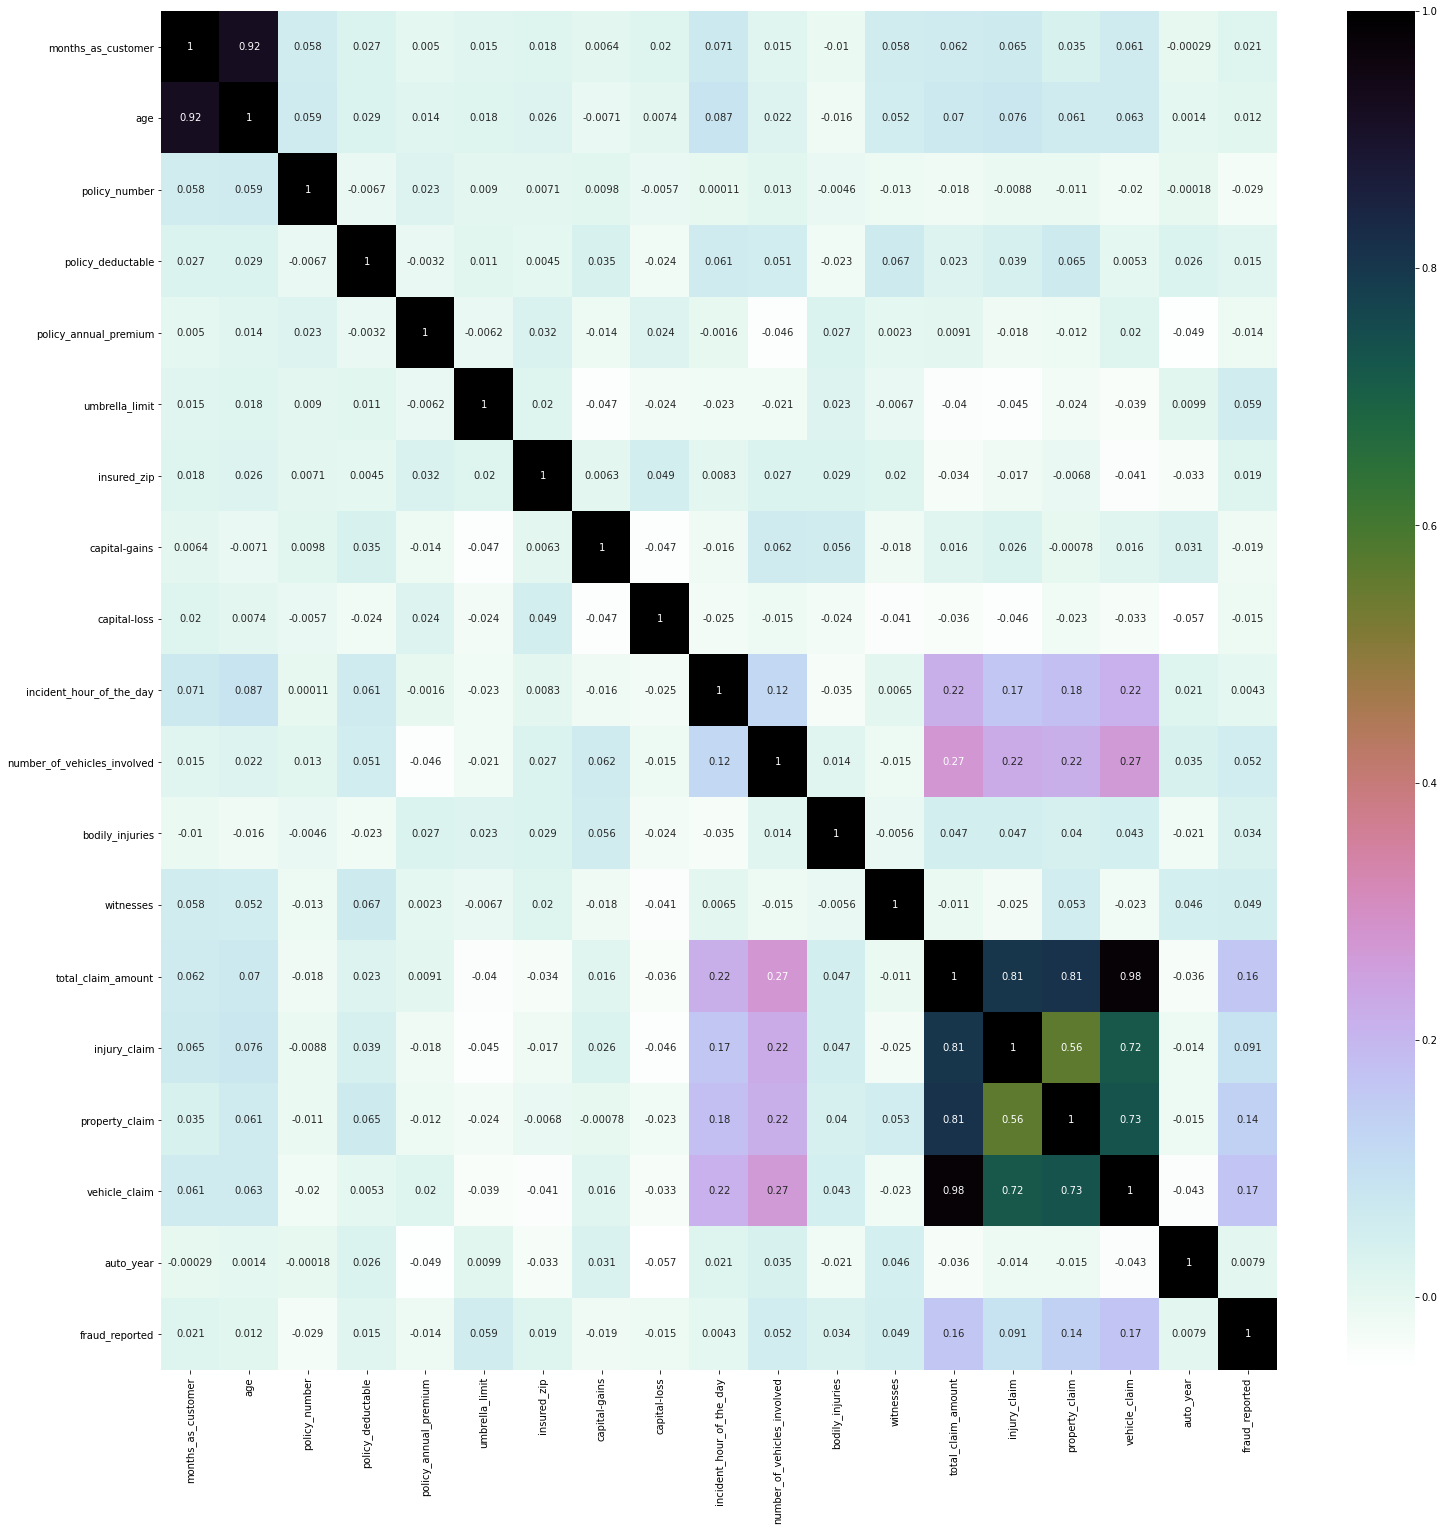

In [37]:
# corelation plot for all the features of the dataset
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),
            annot=True,
            cmap='cubehelix_r')
plt.show()

In [111]:
# determine which all features have a correlation value of more than 0.5
for i in corr.index:
#    col_names = corr.columns
    for j in corr.columns:
        if corr[i][j] >= 0.5 and i != j:
            print('Correlation value of',i,'and',j,'is',corr[i][j])

Correlation value of months_as_customer and age is 0.9220983225789804
Correlation value of age and months_as_customer is 0.9220983225789804
Correlation value of total_claim_amount and injury_claim is 0.805025363056183
Correlation value of total_claim_amount and property_claim is 0.8106864951229711
Correlation value of total_claim_amount and vehicle_claim is 0.9827731790805634
Correlation value of injury_claim and total_claim_amount is 0.805025363056183
Correlation value of injury_claim and property_claim is 0.5638659408577098
Correlation value of injury_claim and vehicle_claim is 0.7228778148571297
Correlation value of property_claim and total_claim_amount is 0.8106864951229711
Correlation value of property_claim and injury_claim is 0.5638659408577098
Correlation value of property_claim and vehicle_claim is 0.7320900444571797
Correlation value of vehicle_claim and total_claim_amount is 0.9827731790805634
Correlation value of vehicle_claim and injury_claim is 0.7228778148571297
Correlat

In [112]:
# Now we will find the correlation of the columns with the target variable.

data[data.columns].corr()['fraud_reported'][:]


months_as_customer             0.020544
age                            0.012143
policy_number                 -0.029443
policy_deductable              0.014817
policy_annual_premium         -0.014480
umbrella_limit                 0.058622
insured_zip                    0.019368
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_hour_of_the_day       0.004316
number_of_vehicles_involved    0.051839
bodily_injuries                0.033877
witnesses                      0.049497
total_claim_amount             0.163651
injury_claim                   0.090975
property_claim                 0.137835
vehicle_claim                  0.170049
auto_year                      0.007928
fraud_reported                 1.000000
Name: fraud_reported, dtype: float64

In [458]:
# I will drop the columns which have high correlation with other independent features but less correlation with target variable.
data = data.drop(["age", "injury_claim", "property_claim", "total_claim_amount"], axis=1)

In [122]:
data.shape

(1000, 27)

In [123]:
# saving the cleaned data to new excel file.
data.to_csv('insurance_cleaned.csv', index=False)

In [385]:
data_cleaned = pd.read_csv("C:\\Users\\Anju\\Desktop\\Data science misc\\Hand on Projects\\Auto Insurance Fraud Prediction - Streamlit\\insurance_cleaned.csv")

In [65]:
data_cleaned.dtypes

months_as_customer               int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
vehicle_claim                    int64
auto_make                       object
auto_year                

In [386]:
# label endcoding for the object datatypes.
for col in ['insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage','police_report_available', 'auto_make']:
    if (data_cleaned[col].dtype == 'object'):
        le = preprocessing.LabelEncoder()
        le = le.fit(data_cleaned[col])
        data_cleaned[col] = le.transform(data_cleaned[col])
        print('Completed Label encoding on',col)

Completed Label encoding on insured_sex
Completed Label encoding on insured_education_level
Completed Label encoding on insured_occupation
Completed Label encoding on insured_hobbies
Completed Label encoding on insured_relationship
Completed Label encoding on incident_type
Completed Label encoding on collision_type
Completed Label encoding on incident_severity
Completed Label encoding on authorities_contacted
Completed Label encoding on property_damage
Completed Label encoding on police_report_available
Completed Label encoding on auto_make


In [72]:
data_cleaned.head()

,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,521585,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,3,0,4,5,1,2,1,2,2,52080,10,2004,1
1,228,342868,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,0,1,4,8,1,0,0,0,0,3510,8,2007,1
2,134,687698,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,2,1,4,7,3,1,2,3,1,23100,4,2007,0
3,256,227811,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,1,0,4,5,1,0,1,2,1,50720,3,2014,1
4,228,367455,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,0,1,2,20,1,1,0,1,1,4550,0,2009,0


In [125]:
corr_cleaned = data_cleaned.corr()
corr_cleaned

,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.061013,-0.000292,0.020544
policy_number,0.057555,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.020184,-0.000183,-0.029443
policy_deductable,0.026807,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.038584,0.009893,0.058622
insured_zip,0.017895,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.041083,-0.032736,0.019368
capital-gains,0.006399,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015836,0.031398,-0.019173
capital-loss,0.020209,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.032665,-0.056615,-0.014863
incident_hour_of_the_day,0.070639,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.215626,0.021368,0.004316
number_of_vehicles_involved,0.014736,0.013432,0.051214,-0.045991,-0.021270,0.027448,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.269393,0.034554,0.051839


In [126]:
data_cleaned[data_cleaned.columns].corr()['fraud_reported'][:]

months_as_customer             0.020544
policy_number                 -0.029443
policy_deductable              0.014817
policy_annual_premium         -0.014480
umbrella_limit                 0.058622
insured_zip                    0.019368
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_hour_of_the_day       0.004316
number_of_vehicles_involved    0.051839
bodily_injuries                0.033877
witnesses                      0.049497
vehicle_claim                  0.170049
auto_year                      0.007928
fraud_reported                 1.000000
Name: fraud_reported, dtype: float64

In [ ]:
# Dropping few more columns which have very less correlation with target variable.
# Separating input and target variables.

In [128]:
X = data_cleaned.drop(['fraud_reported', 'capital-loss', 'policy_number','policy_annual_premium','capital-gains','insured_zip'],axis=1)
y = data_cleaned['fraud_reported']

In [132]:
X.shape

(1000, 21)

# Using chi square for feature selection of categorical features.

In [ ]:
# In our dataset, column 'umbrella_limit' has a negative value -1000000, so we will replace it with 0.
# We need to check this because
# If any column is having a negative value, we need to replace them with 0 as chi square doesn't work on negative values.

In [139]:
# code to replace all negative value with 0 

X.loc[X['umbrella_limit'] < 0]
  

,months_as_customer,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim,auto_make,auto_year
290,284,500,-1000000,1,0,6,11,5,2,3,0,0,13,1,2,0,1,0,68480,3,1996


In [140]:
X['umbrella_limit'].dtype
X['umbrella_limit'] = X['umbrella_limit'].astype(str)
X['umbrella_limit'] = X['umbrella_limit'].str.replace('-1000000', '0')
X['umbrella_limit'] = X['umbrella_limit'].astype(int)
X['umbrella_limit'].dtype

dtype('int32')

In [141]:
X.loc[X['umbrella_limit'] < 0]   # No more rows with negative values.

,months_as_customer,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim,auto_make,auto_year


# Using Chi square on input and target variables.

In [142]:
# If any column is having a negative value, we need to replace them with 0 as chi square doesn't work on negative values.

chi_scores = chi2(X,y)


In [143]:
chi_scores  # We can see below that we have two arrays. So, first array represents chi square values 
            # and second array represents p-values.

(array([2.73925664e+01, 7.22834461e+01, 1.63031796e+07, 5.11837872e-01,
        9.92123137e-02, 5.93073552e-03, 7.25093249e+00, 5.17412489e-01,
        2.53002377e+00, 8.22965121e+00, 1.22804296e+02, 2.27023703e+00,
        7.72213279e-02, 1.51543724e+00, 6.50296722e-01, 7.77356032e-01,
        2.03281026e+00, 5.35814156e-01, 2.71665774e+05, 1.88154130e+00,
        1.13337951e-03]),
 array([1.66068380e-07, 1.86404504e-17, 0.00000000e+00, 4.74344336e-01,
        7.52776944e-01, 9.38614580e-01, 7.08642033e-03, 4.71947532e-01,
        1.11698533e-01, 4.12114492e-03, 1.53904737e-28, 1.31879731e-01,
        7.81098906e-01, 2.18311282e-01, 4.20006614e-01, 3.77950981e-01,
        1.53935739e-01, 4.64172672e-01, 0.00000000e+00, 1.70159073e-01,
        9.73143729e-01]))

In [96]:
# Plotting the p_values to check which of the columns are more important.

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)


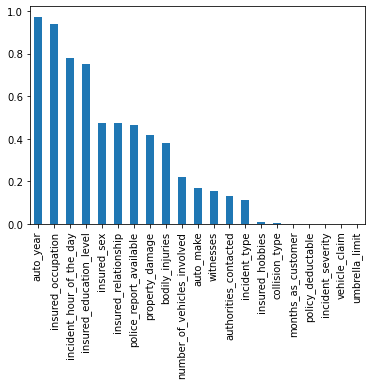

In [97]:
p_values.plot.bar()

In [144]:
# We can see above that most of the columns have higher P values which means these variables are highly independent of the 
# target varaible.
# So we will use the variables which have very less or almost nill p values as they will have good correlation with the
# target variable. And we will use these columns for our model building.

In [147]:
# After careful consideration, we will use the below columns to build our model to predict auto fraud.

'insured_hobbies', 'collision_type',  'months_as_customer', 'policy_deductable', 'incident_severity',
'vehicle_claim', 'umbrella_limit', 'number_of_vehicles_involved' ,'bodily_injuries','witnesses', 'incident_type',
'authorities contacted'  


In [154]:
data_new = data[['insured_hobbies', 'collision_type',  'months_as_customer', 'policy_deductable', 'incident_severity',
'vehicle_claim', 'umbrella_limit', 'number_of_vehicles_involved' ,'bodily_injuries','witnesses', 'incident_type',
'authorities_contacted']]

In [155]:
data_new.head()

,insured_hobbies,collision_type,months_as_customer,policy_deductable,incident_severity,vehicle_claim,umbrella_limit,number_of_vehicles_involved,bodily_injuries,witnesses,incident_type,authorities_contacted
0,sleeping,Side Collision,328,1000,Major Damage,52080,0,1,1,2,Single Vehicle Collision,Police
1,reading,?,228,2000,Minor Damage,3510,5000000,1,0,0,Vehicle Theft,Police
2,board-games,Rear Collision,134,2000,Minor Damage,23100,5000000,3,2,3,Multi-vehicle Collision,Police
3,board-games,Front Collision,256,2000,Major Damage,50720,6000000,1,1,2,Single Vehicle Collision,Police
4,board-games,?,228,1000,Minor Damage,4550,6000000,1,0,1,Vehicle Theft,None


# Performing EDA on below columns against target variable to understand the relationship and to clean any more data if needed.

In [ ]:
'insured_hobbies', 'collision_type',  'months_as_customer', 'policy_deductable', 'incident_severity',
'vehicle_claim', 'umbrella_limit', 'number_of_vehicles_involved' ,'bodily_injuries','witnesses', 'incident_type',
'authorities_contacted', 'police_report_available'

# EDA on 'insured_hobbies'

In [459]:
data['insured_hobbies'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
golf              55
movies            55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

Text(0.5, 1.0, 'Fraud reported against insured hobbies')

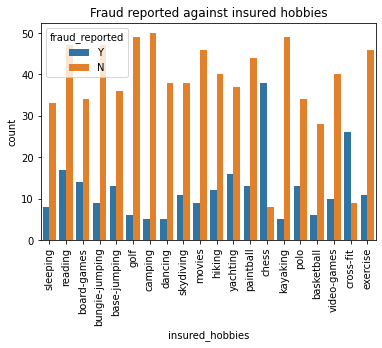

In [164]:
sns.countplot('insured_hobbies', hue = 'fraud_reported', data = data)
plt.xticks(rotation=90)
plt.title('Fraud reported against insured hobbies')

In [ ]:
# We can see in above graph that people with chess and cross-fit as hobby have extremely high number of fraudulent claims.

# So, We will keep them and rename other values as 'other'.


In [462]:
hobbies = data['insured_hobbies'].unique()
for hobby in hobbies:
  if (hobby != 'chess') & (hobby != 'cross-fit'):
    data['insured_hobbies'] = data['insured_hobbies'].str.replace(hobby, 'other')


In [463]:
data['insured_hobbies'].value_counts()

other        919
chess         46
cross-fit     35
Name: insured_hobbies, dtype: int64

In [337]:
data_req['insured_hobbies'].value_counts()

2    919
0     46
1     35
Name: insured_hobbies, dtype: int64

# EDA on 'collision_type'

In [396]:
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [464]:
#replacing ? with 'other'

data['collision_type_new'] = data['collision_type'].str.replace('?', 'other')


In [398]:
data['collision_type_new'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
other              178
Name: collision_type_new, dtype: int64

In [341]:
data_req['collision_type'].value_counts()

2    292
3    276
1    254
0    178
Name: collision_type, dtype: int64

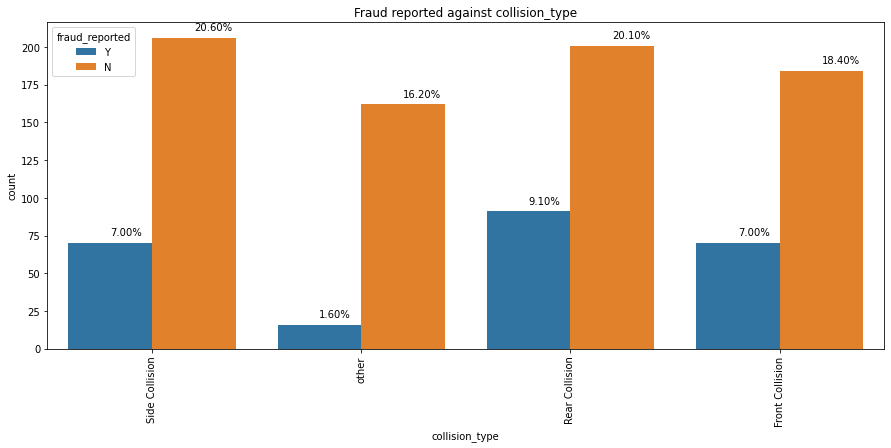

In [176]:
# We can see from below plot that Rear Collision type has the highest number of frauds reported.
# While there are significant numbers of false claims in front and side collisions,rear collisions are the highest.
# This data is of the US and many people there use dash cams while driving to record whatever is happening while they drive. 
# In rear collisions, the footage from dash cams is not very helpful to onclusively prove whose mistake it was.
# Whether it was insurance owner or other car owner, maybe that is the reason for more fradulent claims in rear collisions.

plt.figure(figsize=(15,6))
plt.title('Fraud reported against collision_type')
total = float(len(data))
ax = sns.countplot(x="collision_type", data=data, hue = 'fraud_reported')
plt.xticks(rotation=90)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')


# EDA on 'months_as_customer'

Text(0, 0.5, 'Number of customers')

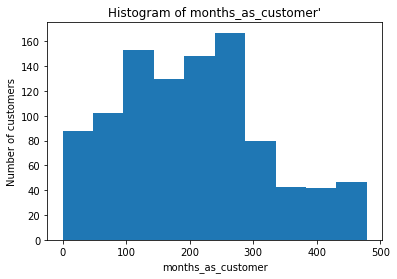

In [184]:
plt.hist(data.months_as_customer)
plt.title("Histogram of months_as_customer'")
plt.xlabel("months_as_customer")
plt.ylabel("Number of customers")

In [193]:
data['months_as_customer'].describe()

count    1000.000000
mean      203.954000
std       115.113174
min         0.000000
25%       115.750000
50%       199.500000
75%       276.250000
max       479.000000
Name: months_as_customer, dtype: float64

In [404]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

data['months_as_customer_groups'] = pd.cut(data['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)

In [356]:
data['months_as_customer_groups'].value_counts()

251-300    167
101-150    153
201-250    148
151-200    130
51-100     102
0-50        88
301-350     80
451-500     47
351-400     43
401-450     42
Name: months_as_customer_groups, dtype: int64

In [367]:
data_req['months_as_customer_groups'].value_counts()

4    167
1    153
3    148
2    130
9    102
0     88
5     80
8     47
6     43
7     42
Name: months_as_customer_groups, dtype: int64

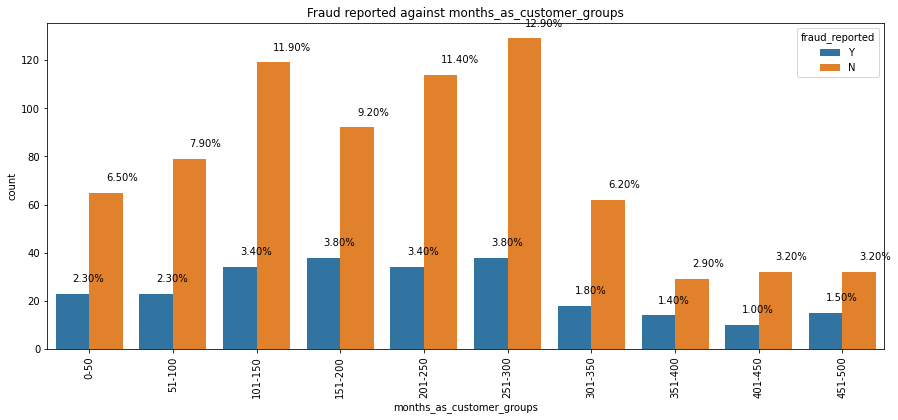

In [196]:
# We can see from below plot that customers who stayed with the insurer in the range of 151-200 and 251-300 months committed
# the most frauds.

plt.figure(figsize=(15,6))
plt.title('Fraud reported against months_as_customer_groups')
total = float(len(data))
ax = sns.countplot(x="months_as_customer_groups", data=data, hue = 'fraud_reported')
plt.xticks(rotation=90)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')
    

# EDA on 'policy_deductable'

In [190]:
data['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

In [339]:
data_req['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

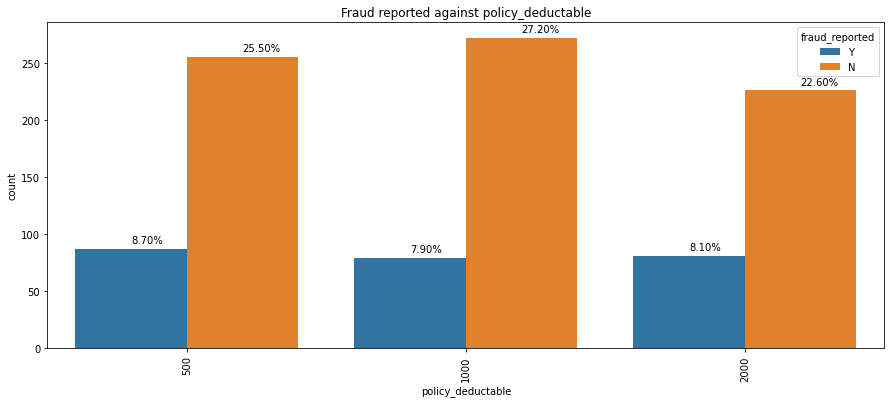

In [192]:
# We can see from below plot that customers paying deductible within the range of 0-500 committed the highest no of frauds.

plt.figure(figsize=(15,6))
plt.title('Fraud reported against policy_deductable')
total = float(len(data))
ax = sns.countplot(x="policy_deductable", data=data, hue = 'fraud_reported')
plt.xticks(rotation=90)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')


# EDA on 'incident_severity'

In [197]:
data['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [342]:
data_req['incident_severity'].value_counts()

1    354
2    280
0    276
3     90
Name: incident_severity, dtype: int64

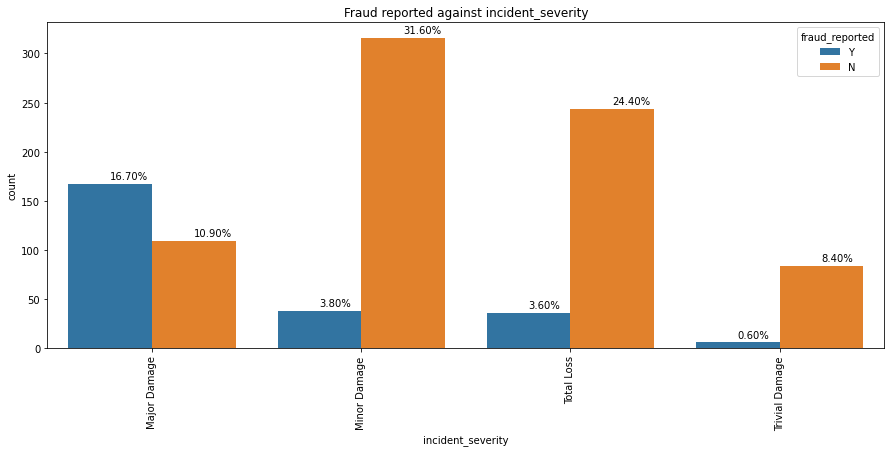

In [200]:
# We can see from below plot that customers having vehicles with Major Damage committed the highest no of frauds.
# Here, compared to minor damage, total loss and trivial damage, fraudulent claims are highest in major damage.
# One reason could be that the high amount of repair cost which will be incurred by the insurer due to major damage.

plt.figure(figsize=(15,6))
plt.title('Fraud reported against incident_severity')
total = float(len(data))
ax = sns.countplot(x='incident_severity', data=data, hue = 'fraud_reported')
plt.xticks(rotation=90)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')


# EDA on 'vehicle_claim'

Text(0, 0.5, 'Number of customers')

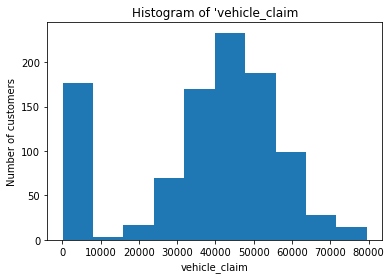

In [204]:
# Highest number of customers claimed amount between 40000-50000.

plt.hist(data.vehicle_claim)
plt.title("Histogram of 'vehicle_claim")
plt.xlabel("vehicle_claim")
plt.ylabel("Number of customers")


In [205]:
data['vehicle_claim'].describe()

count     1000.000000
mean     37928.950000
std      18886.252893
min         70.000000
25%      30292.500000
50%      42100.000000
75%      50822.500000
max      79560.000000
Name: vehicle_claim, dtype: float64

In [403]:
# Binning the vehicle claim amount.

bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]
bin_labels = ['0-10000','10001-20000','20001-30000','30001-40000','40001-50000','50001-60000','60001-70000','70001-80000']

data['vehicle_claim_groups'] = pd.cut(data['vehicle_claim'], bins = 8, labels = bin_labels, include_lowest= True)


In [358]:
# As expected, Highest number of customers claimed amount between 40000-50000.

data['vehicle_claim_groups'].value_counts()


40001-50000    287
50001-60000    194
30001-40000    191
0-10000        178
60001-70000     62
20001-30000     62
70001-80000     20
10001-20000      6
Name: vehicle_claim_groups, dtype: int64

In [368]:
data_req['vehicle_claim_groups'].value_counts()

4    287
5    194
3    191
0    178
6     62
2     62
7     20
1      6
Name: vehicle_claim_groups, dtype: int64

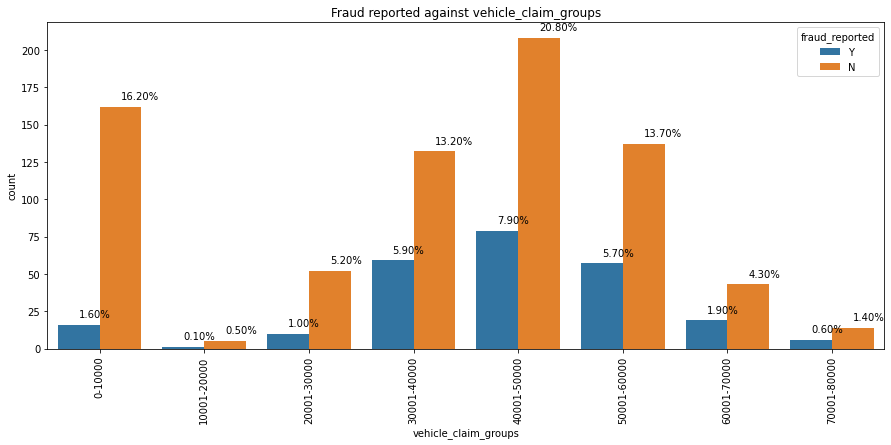

In [208]:
# Customers claiming vehicle_claim amount between 40000-50000 committed the highest no of frauds.

plt.figure(figsize=(15,6))
plt.title('Fraud reported against vehicle_claim_groups')
total = float(len(data))
ax = sns.countplot(x='vehicle_claim_groups', data=data, hue = 'fraud_reported')
plt.xticks(rotation=90)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')


# EDA on 'umbrella_limit'

In [423]:
data['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [424]:
data['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [465]:
data['umbrella_limit'].dtype
data['umbrella_limit'] = data['umbrella_limit'].astype(str)
data['umbrella_limit'] = data['umbrella_limit'].str.replace('-1000000', '1000000')
data['umbrella_limit'] = data['umbrella_limit'].astype(int)
data['umbrella_limit'].dtype

dtype('int32')

In [466]:
data['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000,  1000000,  2000000], dtype=int64)

posx and posy should be finite values
posx and posy should be finite values


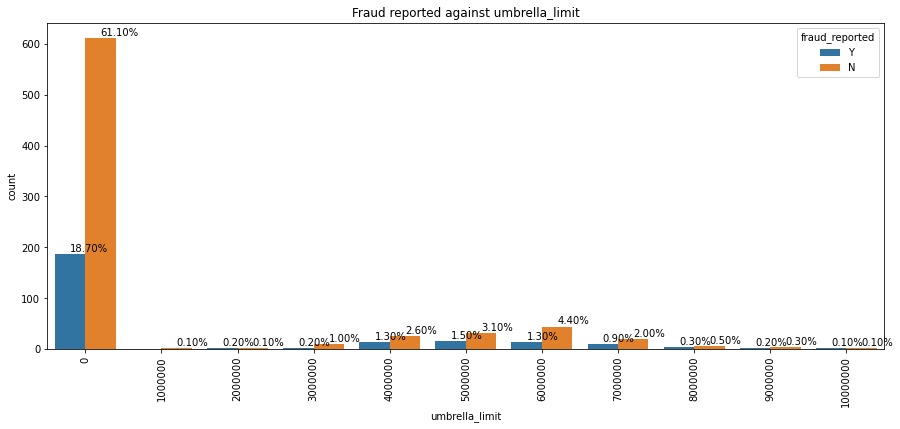

In [431]:
# Customers with no umbrella_limit committed the highest no of frauds.

plt.figure(figsize=(15,6))
plt.title('Fraud reported against umbrella_limit')
total = float(len(data))
ax = sns.countplot(x='umbrella_limit', data=data, hue = 'fraud_reported')
plt.xticks(rotation=90)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

# EDA on 'number_of_vehicles_involved'

In [213]:
#  The count of 1 vehicle/3 vehicles collision is more in our dataset.

data['number_of_vehicles_involved'].value_counts()


1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

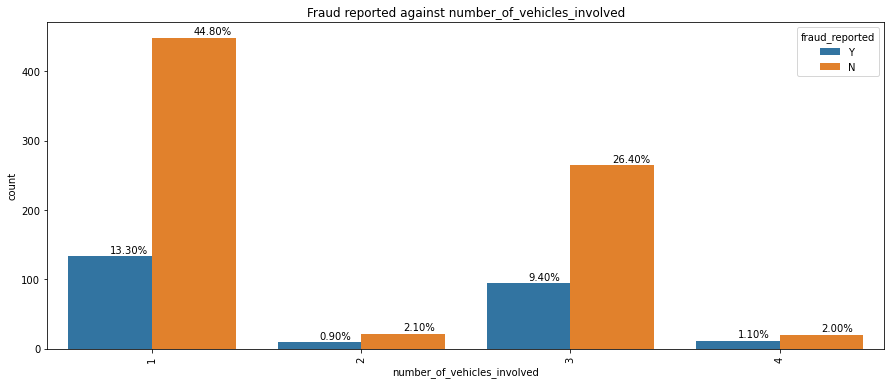

In [214]:
# More frauds were committed when number of vehicles involved in the collision were 1 or 3.

plt.figure(figsize=(15,6))
plt.title('Fraud reported against number_of_vehicles_involved')
total = float(len(data))
ax = sns.countplot(x='number_of_vehicles_involved', data=data, hue = 'fraud_reported')
plt.xticks(rotation=90)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')
    

# EDA on 'bodily_injuries'

In [216]:
data['bodily_injuries'].value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

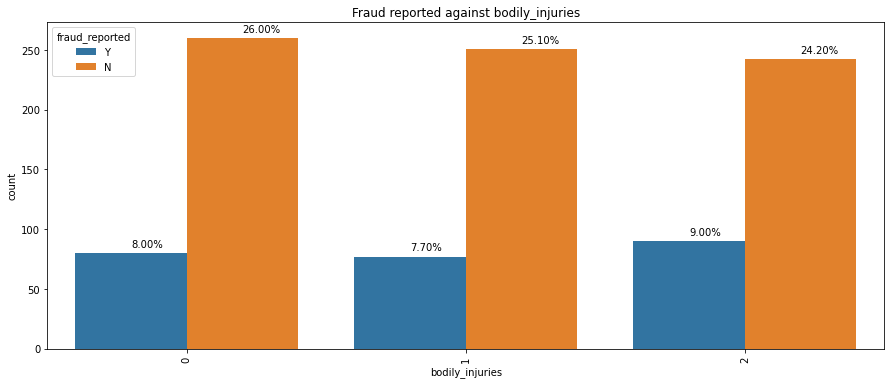

In [217]:
# More frauds were committed when the type of bodily injuries was 2.

plt.figure(figsize=(15,6))
plt.title('Fraud reported against bodily_injuries')
total = float(len(data))
ax = sns.countplot(x='bodily_injuries', data=data, hue = 'fraud_reported')
plt.xticks(rotation=90)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')
    

# EDA on 'witnesses'

In [218]:
data['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

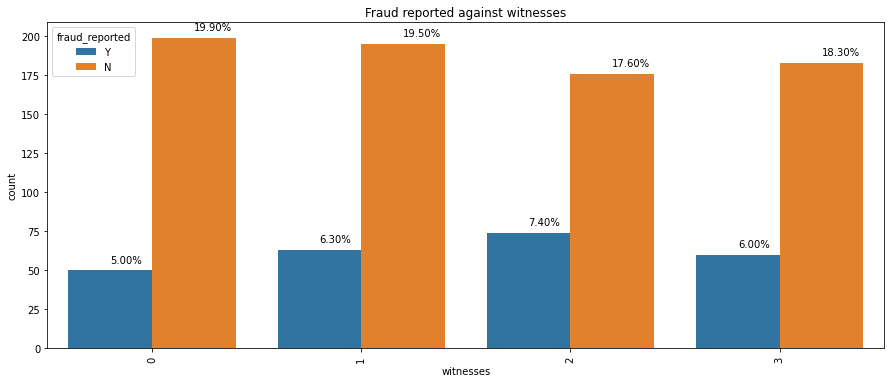

In [219]:
# Highest number of frauds were committed even when the number of witnesses were 2.

plt.figure(figsize=(15,6))
plt.title('Fraud reported against witnesses')
total = float(len(data))
ax = sns.countplot(x='witnesses', data=data, hue = 'fraud_reported')
plt.xticks(rotation=90)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')
    

# EDA on 'incident_type'

In [221]:
data['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [343]:
data_req['incident_type'].value_counts()

0    419
2    403
3     94
1     84
Name: incident_type, dtype: int64

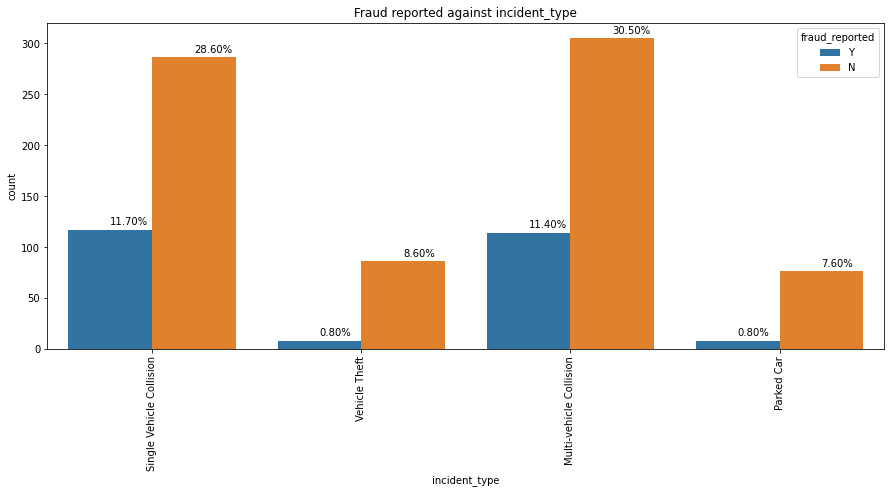

In [222]:
# Highest number of frauds were committed by customers who faced single vehicle collision .
# Multi-vehicle and single vehicle collisions have more number of frauds compared to parked and vehicle theft. 
# One of the reasons could be that in a collision, there is high possibility of more damage to car, 
# as well as the passengers and hence the need to file false insurance claims.

plt.figure(figsize=(15,6))
plt.title('Fraud reported against incident_type')
total = float(len(data))
ax = sns.countplot(x='incident_type', data=data, hue = 'fraud_reported')
plt.xticks(rotation=90)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')
    

# EDA on 'authorities_contacted'

In [223]:
data['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [344]:
data_req['authorities_contacted'].value_counts()

4    292
1    223
3    198
0    196
2     91
Name: authorities_contacted, dtype: int64

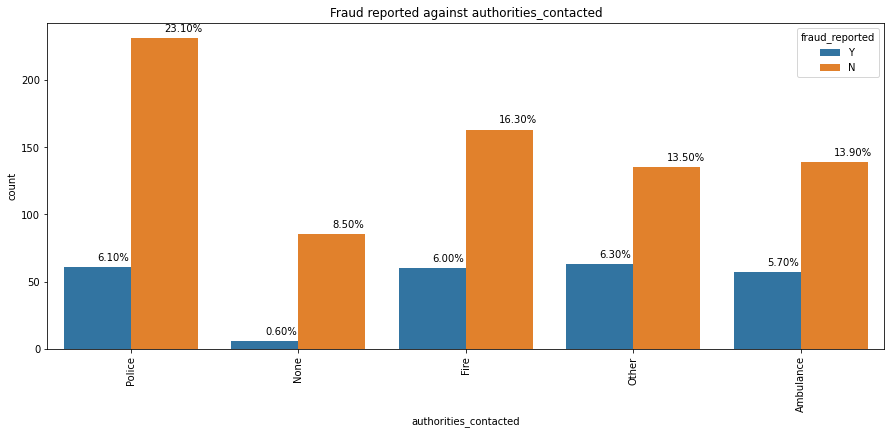

In [224]:

plt.figure(figsize=(15,6))
plt.title('Fraud reported against authorities_contacted')
total = float(len(data))
ax = sns.countplot(x='authorities_contacted', data=data, hue = 'fraud_reported')
plt.xticks(rotation=90)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

# EDA on 'police_report_available'

In [399]:
data['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [467]:
#replacing ? with 'other'

data['police_report_available_new'] = data['police_report_available'].str.replace('?', 'other')

In [401]:
data['police_report_available_new'].value_counts()

NO       343
other    343
YES      314
Name: police_report_available_new, dtype: int64

In [340]:
data_req['police_report_available'].value_counts()

1    343
0    343
2    314
Name: police_report_available, dtype: int64

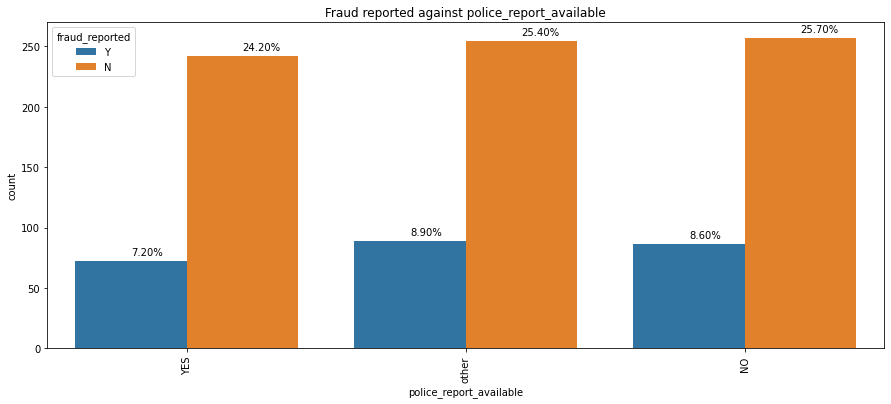

In [227]:
plt.figure(figsize=(15,6))
plt.title('Fraud reported against police_report_available')
total = float(len(data))
ax = sns.countplot(x='police_report_available', data=data, hue = 'fraud_reported')
plt.xticks(rotation=90)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

In [230]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39', 'age_group',
       'months_as_customer_groups', 'vehicle_claim_groups'],
      dtype='object')

In [468]:
data_new = data

In [469]:
# Saving data_new to csv (modified columns are insured_hobbies - insured_hobbies_new, collision_type - collision_type_new,
# police_report_available - police_report_available_new, umbrella_limit)

data_new.to_csv('data_new.csv', index = False)

In [411]:
# dataframe with columns that I will use for predicting fraud.

data_req = data[['insured_hobbies_new', 'collision_type_new',  'months_as_customer_groups', 'policy_deductable', 'incident_severity',
'vehicle_claim_groups', 'umbrella_limit', 'number_of_vehicles_involved' ,'bodily_injuries','witnesses', 'incident_type', 
'authorities_contacted' ,'police_report_available_new']]


In [412]:
data_req.dtypes

insured_hobbies_new              object
collision_type_new               object
months_as_customer_groups      category
policy_deductable                 int64
incident_severity                object
vehicle_claim_groups           category
umbrella_limit                    int64
number_of_vehicles_involved       int64
bodily_injuries                   int64
witnesses                         int64
incident_type                    object
authorities_contacted            object
police_report_available_new      object
dtype: object

In [414]:
# First converting the categorical columns to object data type.

cat_cols = ['months_as_customer_groups', 'vehicle_claim_groups']
for col in cat_cols:
    data_req[col] = data_req[col].astype('object')
    

C:\Users\Anju\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [415]:
data_req.dtypes

insured_hobbies_new            object
collision_type_new             object
months_as_customer_groups      object
policy_deductable               int64
incident_severity              object
vehicle_claim_groups           object
umbrella_limit                  int64
number_of_vehicles_involved     int64
bodily_injuries                 int64
witnesses                       int64
incident_type                  object
authorities_contacted          object
police_report_available_new    object
dtype: object

# Saving the data with required columns to build our app for future use.

In [416]:


data_req.to_csv('data_req.csv',index=False)


In [315]:
data_req.columns

Index(['insured_hobbies', 'collision_type', 'months_as_customer_groups',
       'policy_deductable', 'incident_severity', 'vehicle_claim_groups',
       'umbrella_limit', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'incident_type', 'authorities_contacted',
       'police_report_available'],
      dtype='object')

In [470]:
# dataframe with columns that I will use for predicting fraud.

data_req_app = data[['insured_hobbies', 'collision_type_new',  'months_as_customer', 'policy_deductable', 'incident_severity',
'vehicle_claim', 'umbrella_limit', 'number_of_vehicles_involved' ,'bodily_injuries','witnesses', 'incident_type', 
'authorities_contacted' ,'police_report_available_new']]

In [471]:
data_req_app.dtypes

insured_hobbies                object
collision_type_new             object
months_as_customer              int64
policy_deductable               int64
incident_severity              object
vehicle_claim                   int64
umbrella_limit                  int32
number_of_vehicles_involved     int64
bodily_injuries                 int64
witnesses                       int64
incident_type                  object
authorities_contacted          object
police_report_available_new    object
dtype: object

In [472]:
data_req_app.to_csv('data_req_app.csv', index = False)

In [473]:
data_req_app.describe()

,months_as_customer,policy_deductable,vehicle_claim,umbrella_limit,number_of_vehicles_involved,bodily_injuries,witnesses
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.00000,1000.000000,1000.000000
mean,203.954000,1136.000000,37928.950000,1.103000e+06,1.83900,0.992000,1.487000
std,115.113174,611.864673,18886.252893,2.296446e+06,1.01888,0.820127,1.111335
min,0.000000,500.000000,70.000000,0.000000e+00,1.00000,0.000000,0.000000
25%,115.750000,500.000000,30292.500000,0.000000e+00,1.00000,0.000000,1.000000
50%,199.500000,1000.000000,42100.000000,0.000000e+00,1.00000,1.000000,1.000000
75%,276.250000,2000.000000,50822.500000,0.000000e+00,3.00000,2.000000,2.000000
max,479.000000,2000.000000,79560.000000,1.000000e+07,4.00000,2.000000,3.000000


In [236]:
data_target = data_cleaned[['fraud_reported']]

In [237]:
data_target.head()

,fraud_reported
0,1
1,1
2,0
3,1
4,0


In [316]:
print('Shape of input data:' , data_req.shape, 'Shape of target data:', data_target.shape )

Shape of input data: (1000, 13) Shape of target data: (1000, 1)


# Encoding of categorical columns of dataframe 'data_req'.

# one hot encoding 

In [246]:
# Now one hot encoding the categorical columns.

data_req_encode = pd.get_dummies(data_req)
data_req_encode.shape


(1000, 46)

In [247]:
data_req_encode.head()

,policy_deductable,umbrella_limit,number_of_vehicles_involved,bodily_injuries,witnesses,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_other,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,collision_type_other,months_as_customer_groups_0-50,months_as_customer_groups_101-150,months_as_customer_groups_151-200,months_as_customer_groups_201-250,months_as_customer_groups_251-300,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,vehicle_claim_groups_0-10000,vehicle_claim_groups_10001-20000,vehicle_claim_groups_20001-30000,vehicle_claim_groups_30001-40000,vehicle_claim_groups_40001-50000,vehicle_claim_groups_50001-60000,vehicle_claim_groups_60001-70000,vehicle_claim_groups_70001-80000,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,police_report_available_NO,police_report_available_YES,police_report_available_other
0,1000,0,1,1,2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1,2000,5000000,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,2000,5000000,3,2,3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,2000,6000000,1,1,2,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0
4,1000,6000000,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


# Final dataframes with separate input and target features
# df with input features = data_req_encode
# df with target = data_target

In [283]:
# Feature Scaling.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_req_encode = sc.fit_transform(data_req_encode)


# Splitting data into train and test

In [284]:
x_train, x_test, y_train, y_test = train_test_split(data_req_encode, data_target, random_state = 1)

In [285]:
print('x_train:', x_train.shape, 'x_test:', x_test.shape, 'y_train:', y_train.shape, 'y_test:', y_test.shape )

x_train: (750, 46) x_test: (250, 46) y_train: (750, 1) y_test: (250, 1)


# Build Models

# 1. Logistic Regression

In [286]:
log = LogisticRegression()

log.fit(x_train, y_train)
prediction = log.predict(x_test)

score = log.score(x_test, y_test)
print(score)
print()
print(classification_report(y_test, prediction))


0.828

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       180
           1       0.74      0.60      0.66        70

    accuracy                           0.83       250
   macro avg       0.80      0.76      0.77       250
weighted avg       0.82      0.83      0.82       250



C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# SMOTE(Synthetic Minority Over-sampling Technique)

In [254]:
# We could see earlier that target variable 'fraud_reported' is imbalanced. So , we will apply SMOTE to our data 
# and then predict.

In [287]:
oversample = SMOTE(random_state=9)
x_smote, y_smote = oversample.fit_resample(data_req_encode, data_target)

In [288]:
print('x_smote:', x_smote.shape, 'y_smote:', y_smote.shape)

x_smote: (1506, 46) y_smote: (1506, 1)


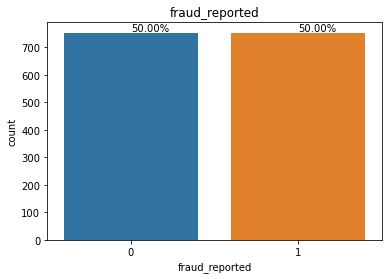

In [275]:
# After balancing the classes of the target variable.

total = float(len(y_smote))
plt.title('fraud_reported')
ax = sns.countplot(x="fraud_reported", data=y_smote)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')
    

In [289]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, random_state = 1)

In [290]:
print('x_train:', x_train.shape, 'x_test:', x_test.shape, 'y_train:', y_train.shape, 'y_test:', y_test.shape )

x_train: (1129, 46) x_test: (377, 46) y_train: (1129, 1) y_test: (377, 1)


In [ ]:
# Applying logistic regression again.

In [291]:
log = LogisticRegression()

log.fit(x_train, y_train)
prediction = log.predict(x_test)

score = log.score(x_test, y_test)
print(score)
print()

print(classification_report(y_test, prediction))

0.8594164456233422

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       201
           1       0.81      0.91      0.86       176

    accuracy                           0.86       377
   macro avg       0.86      0.86      0.86       377
weighted avg       0.86      0.86      0.86       377



C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#  We could see that after balancing the target variable, accuracy increased from 82.8% to 85.9%.

# 2. Decision Tree

In [292]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)
preds = dtc.predict(x_test)

score = dtc.score(x_test, y_test)
print(score)
print()
print(classification_report(y_test, preds))


0.8249336870026526

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       201
           1       0.79      0.86      0.82       176

    accuracy                           0.82       377
   macro avg       0.83      0.83      0.82       377
weighted avg       0.83      0.82      0.83       377



# 3. Random Forest

In [294]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(x_train, y_train)

score = rfc.score(x_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

C:\Users\Anju\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


88.3289124668435

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       201
           1       0.79      0.86      0.82       176

    accuracy                           0.82       377
   macro avg       0.83      0.83      0.82       377
weighted avg       0.83      0.82      0.83       377



# With random forest accuracy increased to 88.3%

# 4. Random Forest with grid search CV

In [298]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[100,300],'n_jobs':[-1], 'max_features': [0.5,0.7,0.9], 'min_samples_split': [2, 5, 10, 15],'max_depth': [3,5,7,15],'min_samples_leaf':[1,2,5,10],'random_state':[14]} 

clf1 = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='roc_auc')
clf1.fit(x_train, y_train)


C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 15],
                         'max_features': [0.5, 0.7, 0.9],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 300], 'n_jobs': [-1],
                         'random_state': [14]},
             scoring='roc_auc')

In [299]:

preds_tuned = clf1.predict(x_test)

score = clf1.score(x_test, y_test)

print(score)


0.9382066938037087


# With Grid search CV, accuracy increased to 93%, hence we will be using random forest clf1 as our final model.

# Label encoding

In [365]:

# label endcoding for the object datatypes.

for col in ['insured_hobbies', 'collision_type',  'months_as_customer_groups', 'policy_deductable', 'incident_severity',
'vehicle_claim_groups', 'umbrella_limit', 'number_of_vehicles_involved' ,'bodily_injuries','witnesses', 'incident_type', 'authorities_contacted' ,'police_report_available']:
    if (data_req[col].dtype == 'object'):
        le = preprocessing.LabelEncoder()
        le = le.fit(data_req[col])
        data_req[col] = le.transform(data_req[col])
        print('Completed Label encoding on',col)


Completed Label encoding on months_as_customer_groups
Completed Label encoding on vehicle_claim_groups


C:\Users\Anju\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [366]:
data_req.head()

,insured_hobbies,collision_type,months_as_customer_groups,policy_deductable,incident_severity,vehicle_claim_groups,umbrella_limit,number_of_vehicles_involved,bodily_injuries,witnesses,incident_type,authorities_contacted,police_report_available
0,17,3,5,1000,0,5,0,1,1,2,2,4,2
1,15,0,3,2000,1,0,5000000,1,0,0,3,4,0
2,2,2,1,2000,1,2,5000000,3,2,3,0,4,1
3,2,1,4,2000,0,5,6000000,1,1,2,2,4,1
4,2,0,3,1000,1,0,6000000,1,0,1,3,2,1


In [320]:
#Final dataframes with separate input and target features
#df with input features = data_req_encode
#df with target = data_target

In [321]:
# Feature Scaling.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_req = sc.fit_transform(data_req)


In [323]:
# Splitting data into train and test

x_train, x_test, y_train, y_test = train_test_split(data_req, data_target, random_state = 1)
print('x_train:', x_train.shape, 'x_test:', x_test.shape, 'y_train:', y_train.shape, 'y_test:', y_test.shape )


x_train: (750, 13) x_test: (250, 13) y_train: (750, 1) y_test: (250, 1)


# Logistic regression before dealing with imbalanced target variable.

In [327]:
log = LogisticRegression()

log.fit(x_train, y_train)
prediction = log.predict(x_test)

score = log.score(x_test, y_test)
print(score)
print()
print(classification_report(y_test, prediction))


C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.82

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       180
           1       0.80      0.47      0.59        70

    accuracy                           0.82       250
   macro avg       0.81      0.71      0.74       250
weighted avg       0.82      0.82      0.80       250



# SMOTE(Synthetic Minority Over-sampling Technique)

In [328]:
oversample = SMOTE(random_state=9)
x_smote, y_smote = oversample.fit_resample(data_req_encode, data_target)

print('x_smote:', x_smote.shape, 'y_smote:', y_smote.shape)


x_smote: (1506, 46) y_smote: (1506, 1)


In [371]:
x_smote

array([[-0.22238259, -0.47947582, -0.82386498, ..., -0.72254413,
         1.47807759, -0.72254413],
       [ 1.41278352,  1.69798022, -0.82386498, ..., -0.72254413,
        -0.67655447,  1.38399852],
       [ 1.41278352,  1.69798022,  1.1400563 , ...,  1.38399852,
        -0.67655447, -0.72254413],
       ...,
       [-1.03996564, -0.47947582,  1.1400563 , ..., -0.72254413,
        -0.63913193,  1.34741122],
       [-1.03996564, -0.47947582, -0.82386498, ...,  0.87281584,
        -0.15370221, -0.72254413],
       [-0.84016867,  0.89794662, -0.82386498, ..., -0.72254413,
        -0.67655447,  1.38399852]])

In [329]:
# Splitting train and test.

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, random_state = 1)

print('x_train:', x_train.shape, 'x_test:', x_test.shape, 'y_train:', y_train.shape, 'y_test:', y_test.shape )


x_train: (1129, 46) x_test: (377, 46) y_train: (1129, 1) y_test: (377, 1)


In [330]:
# Logistic Regression

log = LogisticRegression()

log.fit(x_train, y_train)
prediction = log.predict(x_test)

score = log.score(x_test, y_test)
print(score)
print()

print(classification_report(y_test, prediction))

0.8594164456233422

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       201
           1       0.81      0.91      0.86       176

    accuracy                           0.86       377
   macro avg       0.86      0.86      0.86       377
weighted avg       0.86      0.86      0.86       377



C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
# Random Forest with grid search CV

In [331]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[100,300],'n_jobs':[-1], 'max_features': [0.5,0.7,0.9], 'min_samples_split': [2, 5, 10, 15],'max_depth': [3,5,7,15],'min_samples_leaf':[1,2,5,10],'random_state':[14]} 

clf1 = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='roc_auc')
clf1.fit(x_train, y_train)
preds_tuned = clf1.predict(x_test)

score = clf1.score(x_test, y_test)

print(score)

C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anju\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

0.9382066938037087


In [ ]:
# With Grid search CV, accuracy increased to 93%, hence we will be using random forest clf1 as our final model.
# One point to note is that there is no difference in accuracy whether we do label encoding or one hot encoding.

# Finally save model using pickle and build app uisng SteamLit

In [332]:
import streamlit as st
import pickle

# save the model
filename = 'Streamlit_Autoinsurancefraud.sav'
pickle.dump(clf1, open(filename,'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)


0.9382066938037087


In [301]:
# Now we will use another notebook named 'Predict Auto Insurance Fraud(streamlit)' 
# to build the app to predict the whether a reported claim is fraud or genuine using streamlit and again save the notebook in 
# C folder with name 'streamlitpredictautoinsurancefraud'